<a href="https://colab.research.google.com/github/rhdtka21/Intro-To-AI/blob/master/HW3_SeokJungwoo_2015003209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro to AI – HW3
### 2015003209 석정우

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# 함수 2개는 교수님께서 올려주신 HW2 정답에 있는것을 참고했습니다.

def gen_data_matrix(x, degree):
    
    # Initialize data matrix X
    X = np.zeros((x.shape[0], degree + 1))
    
    # Add features to X
    for d in range(degree + 1):
        X[:, d] = x ** d
  
    return X

def fit_polynomials(X, y):

    # Convert target vector y to column vector
    Y = y.reshape((-1, 1))
            
    # Compute OLS solution
    A = np.matmul(X.transpose(),X)
    b = np.matmul(X.transpose(),Y)
    weight = np.linalg.solve(A, b)
    

    return weight

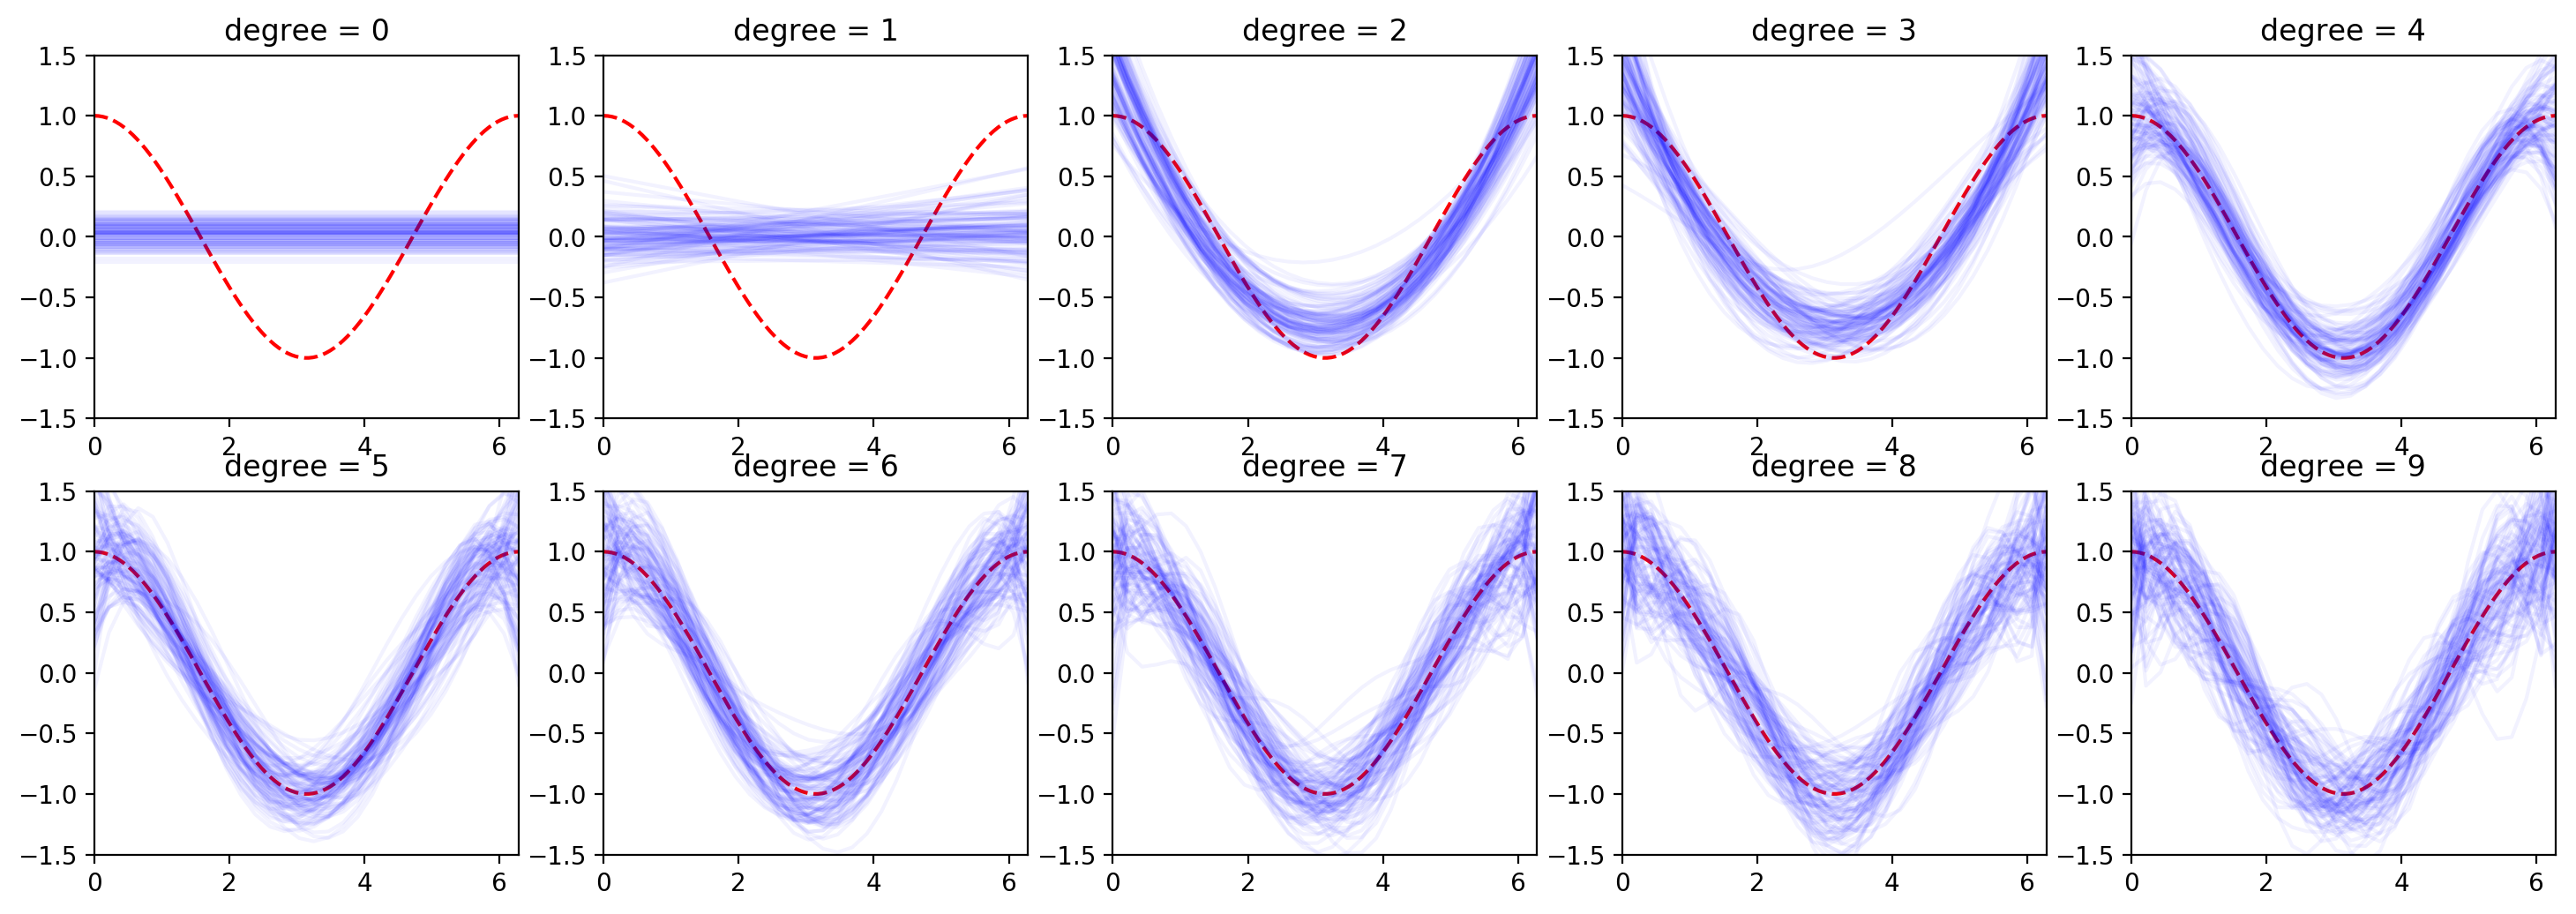

In [0]:
# Training data x
x_train = np.linspace(0, 2*np.pi, 30)

# True data x
x_true = np.linspace(0, 2*np.pi, 100)
# True data y
y_true = np.cos(x_true)


# ====================== Matplotlib Figure ===============================
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 6), dpi=200)
y_train_preds = [[] for _100 in range(10)]

for degree in range(10):
    #x, y축 범위 설정
    axes[degree//5][degree%5].set_xlim((0, 2*np.pi))
    axes[degree//5][degree%5].set_ylim((-1.5, 1.5))

    #True Data 그리기
    axes[degree//5][degree%5].plot(x_true, np.cos(x_true), 'r--', alpha = 1)

    for _ in range(100):
        # Training data y를 100번 생성해서 각각의 weight와 y_train_pred를 만든다.
        y_train = np.cos(x_train) + np.random.normal(loc=0, scale=0.5, size=30)
        
        X_train = gen_data_matrix(x_train, degree)
        weight = fit_polynomials(X_train, y_train)
        y_train_pred = X_train @ weight

        #y_train_pred를 이용해서 평균과 표준 편차를 얻어야 하므로, list에 저장한다.
        y_train_preds[degree].append(y_train_pred.reshape((1, -1)))

        # Plot data and model
        axes[degree//5][degree%5].plot(x_train, y_train_pred, 'b', alpha = 0.05)
    
    #title 쓰기
    axes[degree//5][degree%5].set_title('degree = ' + str(degree))
    
plt.show()

In [0]:
#각 degree에 대해서, length가 30인 벡터 100개의 평균 및 표준 편차를 구한다.
#4차원 배열의 형태로 되어 있어서 가독성이 안좋은데 깔끔하게 처리하는 numpy 사용법을 잘 모르겠습니다. ㅠㅠ

#y_train_preds[degree][100개의 각 회차][무조건 1개이므로 0으로 고정][30개의 각 벡터 항목]

#degree 10개에 대해서 평균, 표준편차를 담을 list를 준비
y_train_means = [[] for _ in range(10)]
y_train_stds = [[] for _ in range(10)]

for degree in range(10):
    for i in range(30):
        temp = [] 
        for j in range(100):
            #모든 회차를 temp에 담고나서
            temp.append(y_train_preds[degree][j][0][i])
            #평균과 표준편차를 구한다.
        y_train_means[degree].append(np.mean(temp))
        y_train_stds[degree].append(np.std(temp))


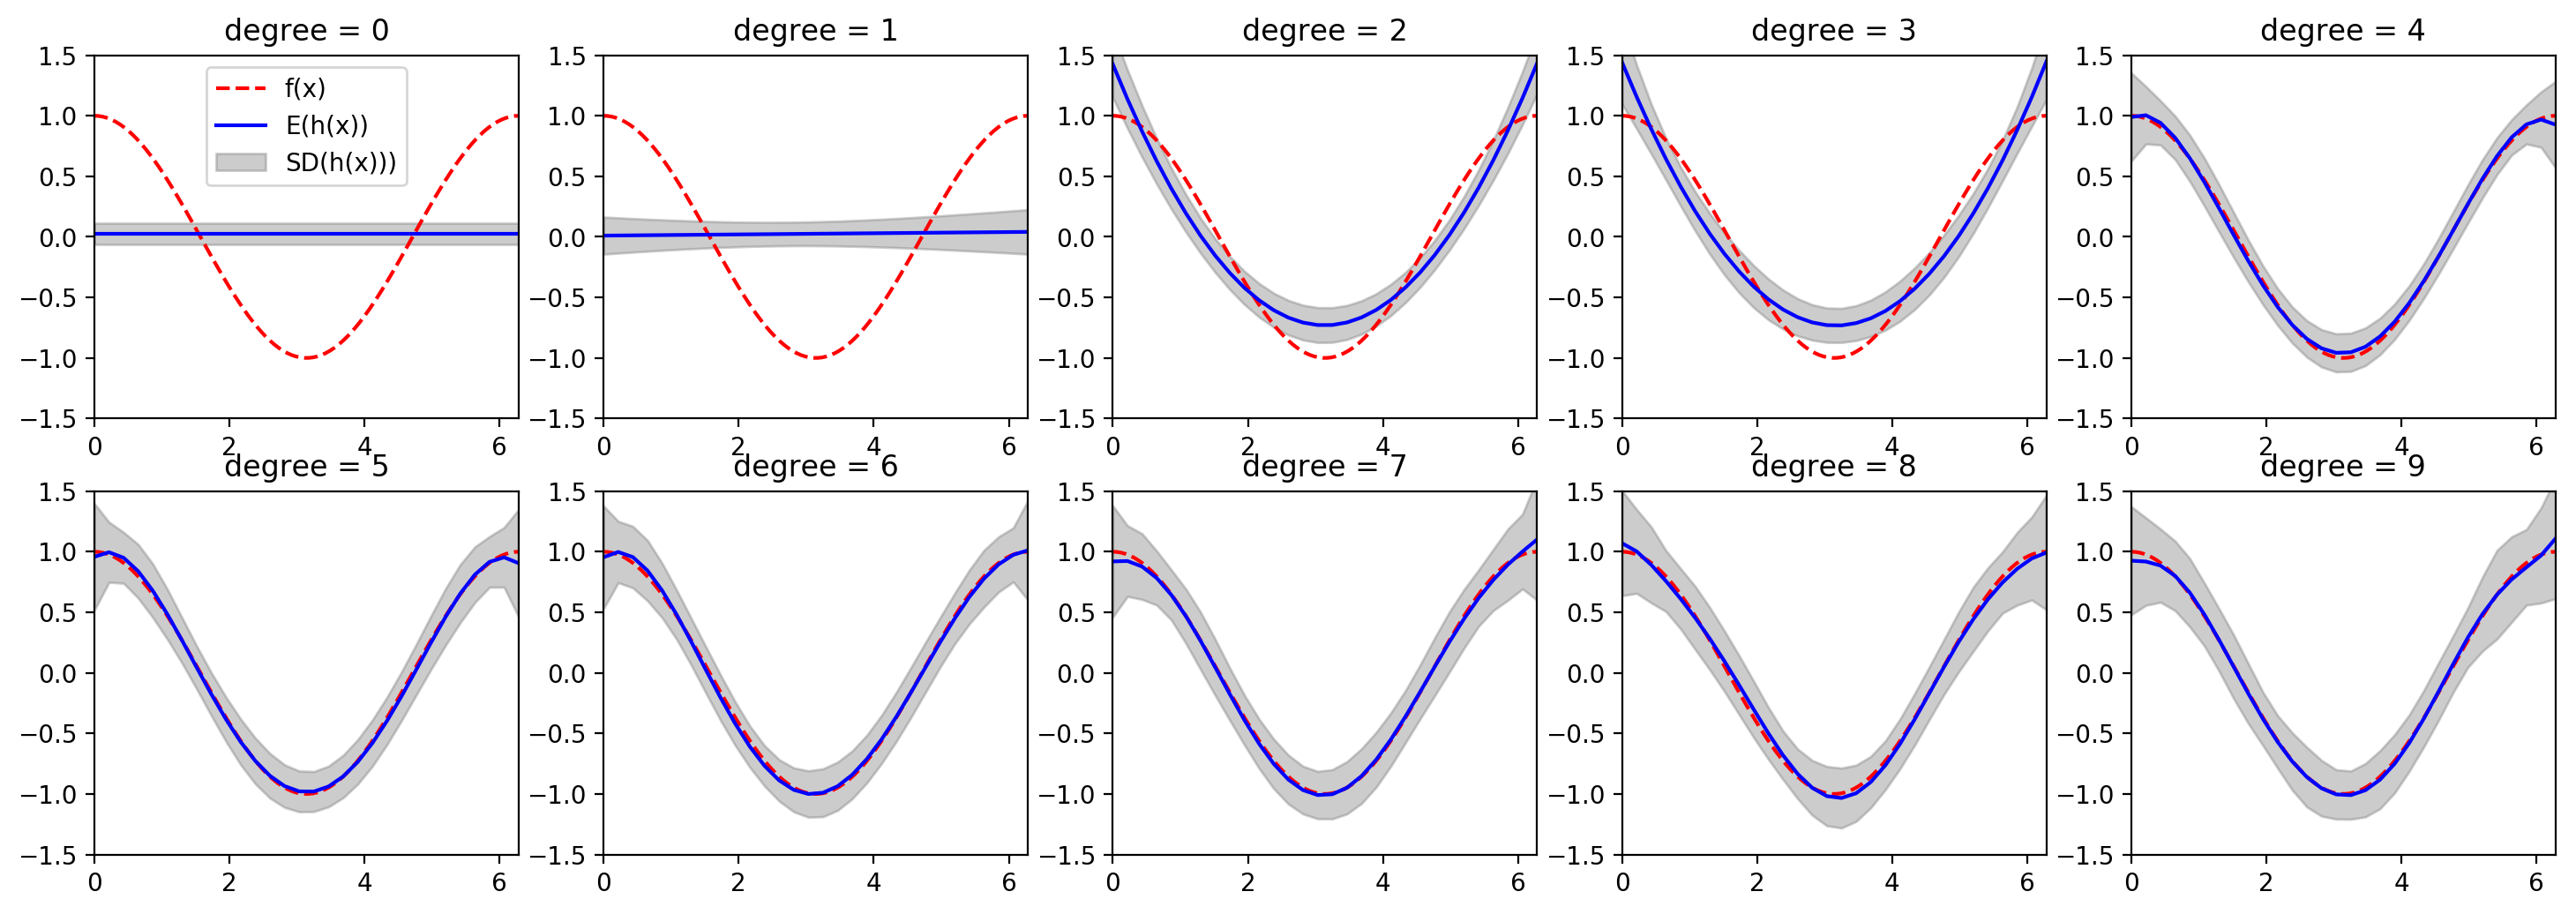

In [0]:
# ====================== Matplotlib Figure ===============================
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 6), dpi=200)

#fill_between을 사용하기 위해서 위 그래프, 아래 그래프를 만든다.
y_train_area_top = [[] for _ in range(10)]
y_train_area_bot = [[] for _ in range(10)]

for degree in range(10):
    for i in range(30):
        #평균 +- 표준편차 그래프 생성
        y_train_area_top[degree].append(y_train_means[degree][i] + y_train_stds[degree][i]) 
        y_train_area_bot[degree].append(y_train_means[degree][i] - y_train_stds[degree][i])
            

for degree in range(10):
    #x, y축 범위 설정
    axes[degree//5][degree%5].set_xlim((0, 2*np.pi))
    axes[degree//5][degree%5].set_ylim((-1.5, 1.5))

    #True Data 그리기
    axes[degree//5][degree%5].plot(x_true, np.cos(x_true), 'r--', alpha = 1, label = 'f(x)')

    #True Data 그리기
    axes[degree//5][degree%5].plot(x_train, y_train_means[degree], color = 'b', alpha = 1, label = 'E(h(x))')

    #True Data 그리기
    axes[degree//5][degree%5].fill_between(x_train, y_train_area_bot[degree],  y_train_area_top[degree], color = 'grey', alpha = 0.4, label = 'SD(h(x)))')
    axes[degree//5][degree%5].set_title('degree = ' + str(degree))

axes[0][0].legend()
plt.show()

In [0]:
#각 degree 별로 bias와 variance를 담을 list 생성
bias = [[] for _ in range(10)]
variance = [[] for _ in range(10)]

for degree in range(10):
    for i in range(30):
        bias[degree].append((y_train_means[degree][i]-np.cos(x_train[i]))**2)
        variance[degree].append((y_train_stds[degree][i])**2)


In [0]:
#x축으로 쓸 값
x_val = np.arange(10)
#y축으로 쓸 값
y_val_bias = []
y_val_variance = []

for degree in range(10):
    #각 degree 별로 30개의 bias와 variance들의 평균을 그래프로 나타낸다.
    y_val_bias.append(np.mean(bias[degree]))
    y_val_variance.append(np.mean(variance[degree]))

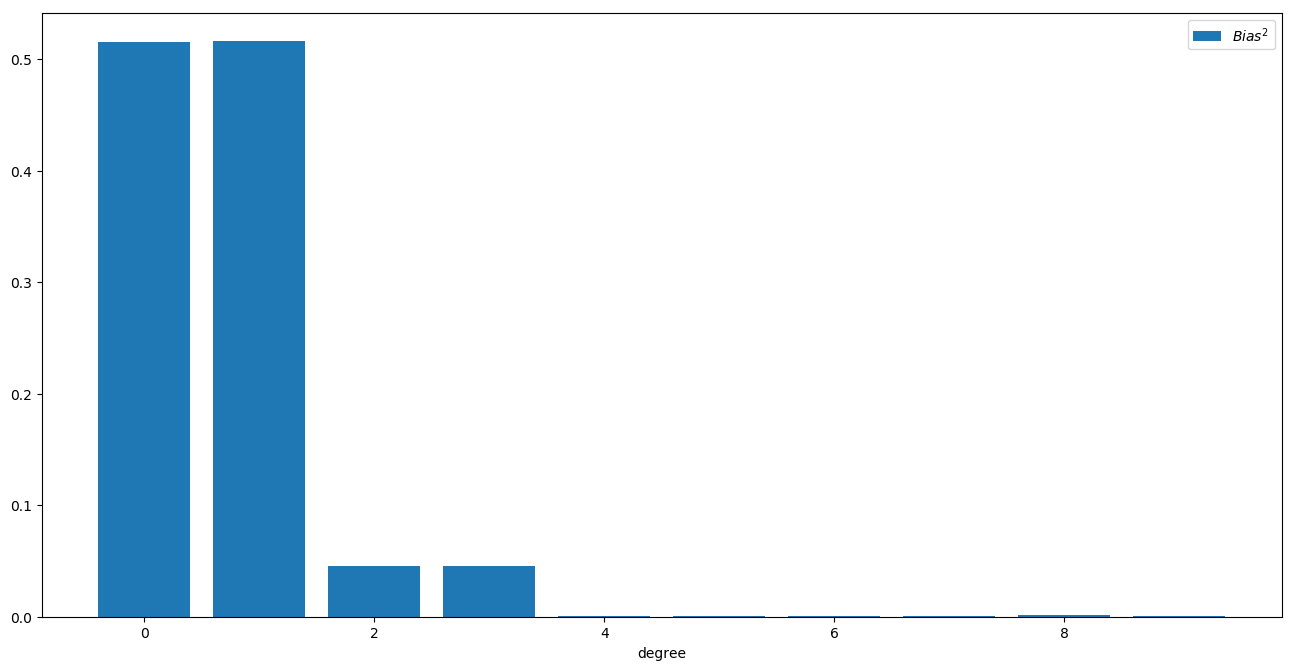

In [0]:
#bias bar그래프
plt.figure(figsize=(16, 8), dpi = 100)
plt.bar(x_val, y_val_bias, label = '$Bias^2$')
plt.xlabel('degree')
plt.legend()
plt.show()

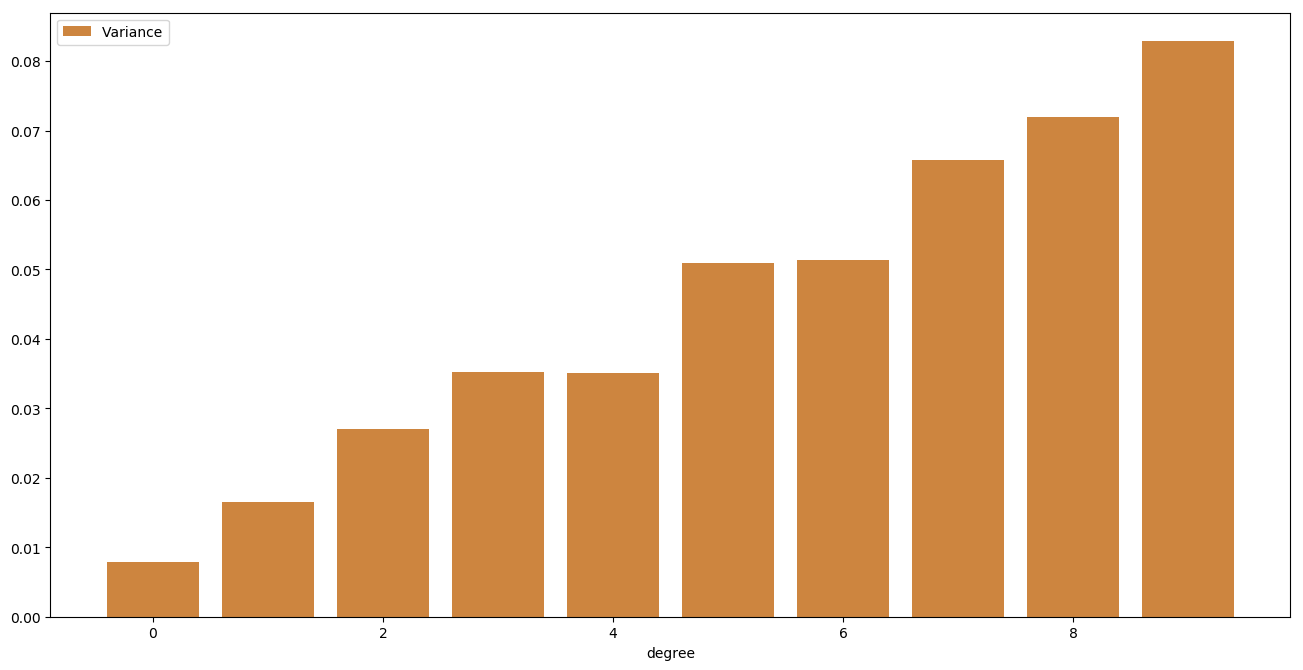

In [0]:
#variance bar그래프
plt.figure(figsize=(16, 8), dpi = 100)
plt.bar(x_val, y_val_variance, label = 'Variance', color = 'peru')
plt.xlabel('degree')
plt.legend()
plt.show()

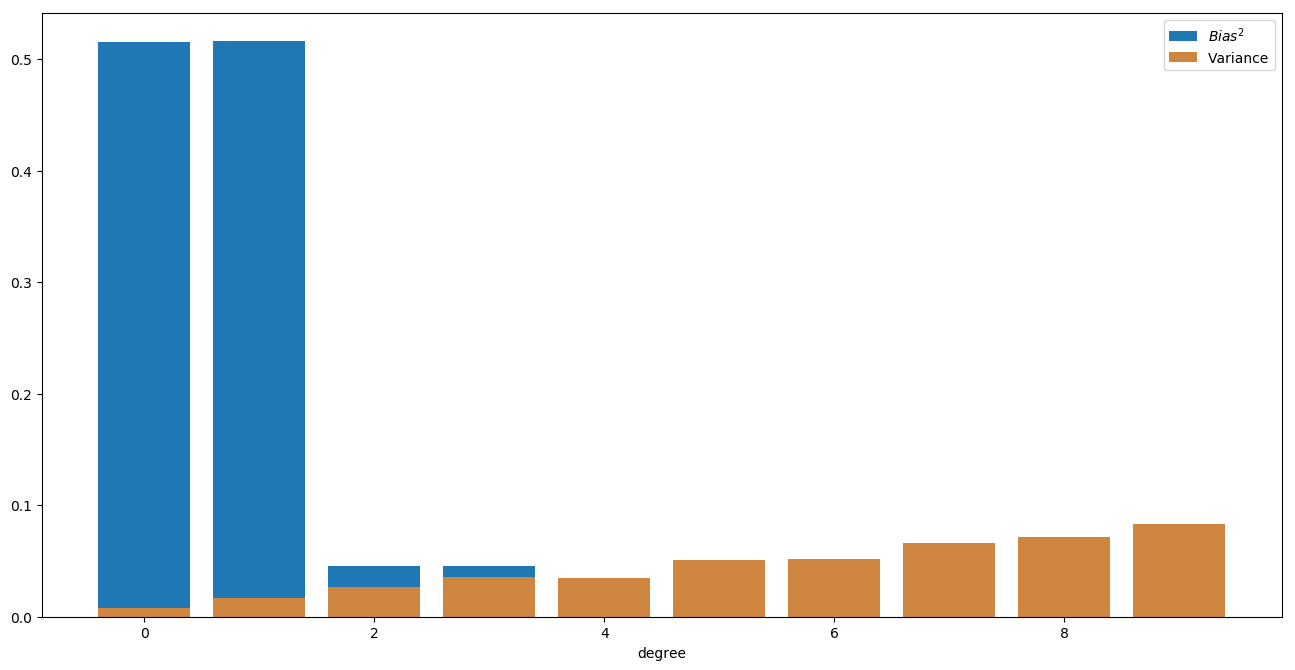

In [0]:
#두개 같이 그리기
plt.figure(figsize=(16, 8), dpi = 100)
plt.bar(x_val, y_val_bias, label = '$Bias^2$')
plt.bar(x_val, y_val_variance, label = 'Variance', color = 'peru')
plt.xlabel('degree')
plt.legend()
plt.show()